In [1]:
import sys
import qgrid
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../lib/')
from dftmanlib.pwscf import pwcalculation_helper, pseudo_helper
from dftmanlib.pwscf.workflow import EOSWorkflow
from dftmanlib.job import PBSJob, pbsjob_statuses, pbs_status
from dftmanlib.matproj import mpquery_helper
from dftmanlib.db import load_db

from tinydb import Query

qgrid.enable()
db = load_db()
pbs_table = db.table('PBSJob')
eos_table = db.table('EOSWorkflow')

PSEUDO_TABLE = '/home/azadoks/.local/share/pseudo/pseudo_table.json'
# available pseudo families:
# ['SSSP_EFFICIENCY', 'SSSP_PRECISION', 'GBRV_US_LDA',
#  'GBRV_US_PBE', 'GBRV_US_PBEsol', 'DOJO_STANDARD_LDA_NC',
#  'DOJO_STANDARD_PBE_NC', 'DOJO_STANDARD_PBEsol_NC',
#  'DOJO_STRINGENT_LDA_NC', 'DOJO_STRINGENT_PBE_NC',
#  'DOJO_STRINGENT_PBAsol_NC']
PSEUDO_FAMILY = 'GBRV_US_PBE'
MP_API_KEY = '0WqdPfXxloze6T9N'

## Materials Project Query

In [2]:
criteria = {
    'elements': 'Al',
    'nsites': 1,
    'spacegroup.number': 225,
}
properties = []
m = mpquery_helper(criteria, properties, MP_API_KEY)
m.query()
m.display()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Base configuration

In [3]:
STRUCTURE = m.result[0]['structure']

PSEUDO = pseudo_helper(STRUCTURE, PSEUDO_FAMILY,
                       PSEUDO_TABLE)
base_inputs = {
        'job_type': 'PBS',
        'structure': STRUCTURE,
        'pseudo': PSEUDO,

        'control': {
            'calculation': 'relax',
            'verbosity': 'high',
            'disk_io': 'none',
        },
        'system': {
            'ibrav': 0,
            'ecutwfc': 45,
            'occupations': 'smearing',
            'degauss': 0.01,
            'smearing': 'mv',
        },
        'electrons': {
            'electron_maxstep': 500,
            'conv_thr': 1.0e-6,
        },
        'ions': {},
        'cell': {},
        'kpoints_mode': 'automatic',
        'kpoints_grid': (20, 20, 20),
        'kpoints_shift': (0, 0, 0),
    }

### Configure, store, and run EOSWorkflow

In [4]:
# workflow = EOSWorkflow(STRUCTURE, PSEUDO, base_inputs,
#                        min_strain=-0.15, max_strain=0.15,
#                        n_strains=10, job_type='PBSJob',
#                        job_kwargs={'command': 'pw.x -inp {input_path:s} > {output_path:s}',
#                                    'headertext': 'set echo\n'\
#                                                  'cd $PBS_O_WORKDIR\n'\
#                                                  'module load intel/17.0.1.132 impi/2017.1.132 espresso/6.3\n',
#                                    'walltime': '04:00:00',
#                                    'nnodes': 1, 'ppn': 20, 'np': 20,
#                                    'queue': 'standby'})

In [5]:
# workflow.run()

In [6]:
workflow = eos_table.get(doc_id=1)

In [7]:
workflow.check_status()

Updated Job 65cf2f377486 in database with doc_id 9
Updated Job 1425f24190c1 in database with doc_id 10
Updated Job 009e7ef4282c in database with doc_id 11
Updated Job 1f06e5a8c91e in database with doc_id 12
Updated Job 0745b51a22d2 in database with doc_id 13
Updated Job 43d7b673d405 in database with doc_id 14
Updated Job 2b0db47e2e4e in database with doc_id 15
Updated Job 52d866ffe52f in database with doc_id 16
Updated Job 57666258298e in database with doc_id 17
Updated Job acc2740b2bba in database with doc_id 18


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
a = workflow.output

Updated Job 65cf2f377486 in database with doc_id 9
Updated Job 1425f24190c1 in database with doc_id 10
Updated Job 009e7ef4282c in database with doc_id 11
Updated Job 1f06e5a8c91e in database with doc_id 12
Updated Job 0745b51a22d2 in database with doc_id 13
Updated Job 43d7b673d405 in database with doc_id 14
Updated Job 2b0db47e2e4e in database with doc_id 15
Updated Job 52d866ffe52f in database with doc_id 16
Updated Job 57666258298e in database with doc_id 17
Updated Job acc2740b2bba in database with doc_id 18


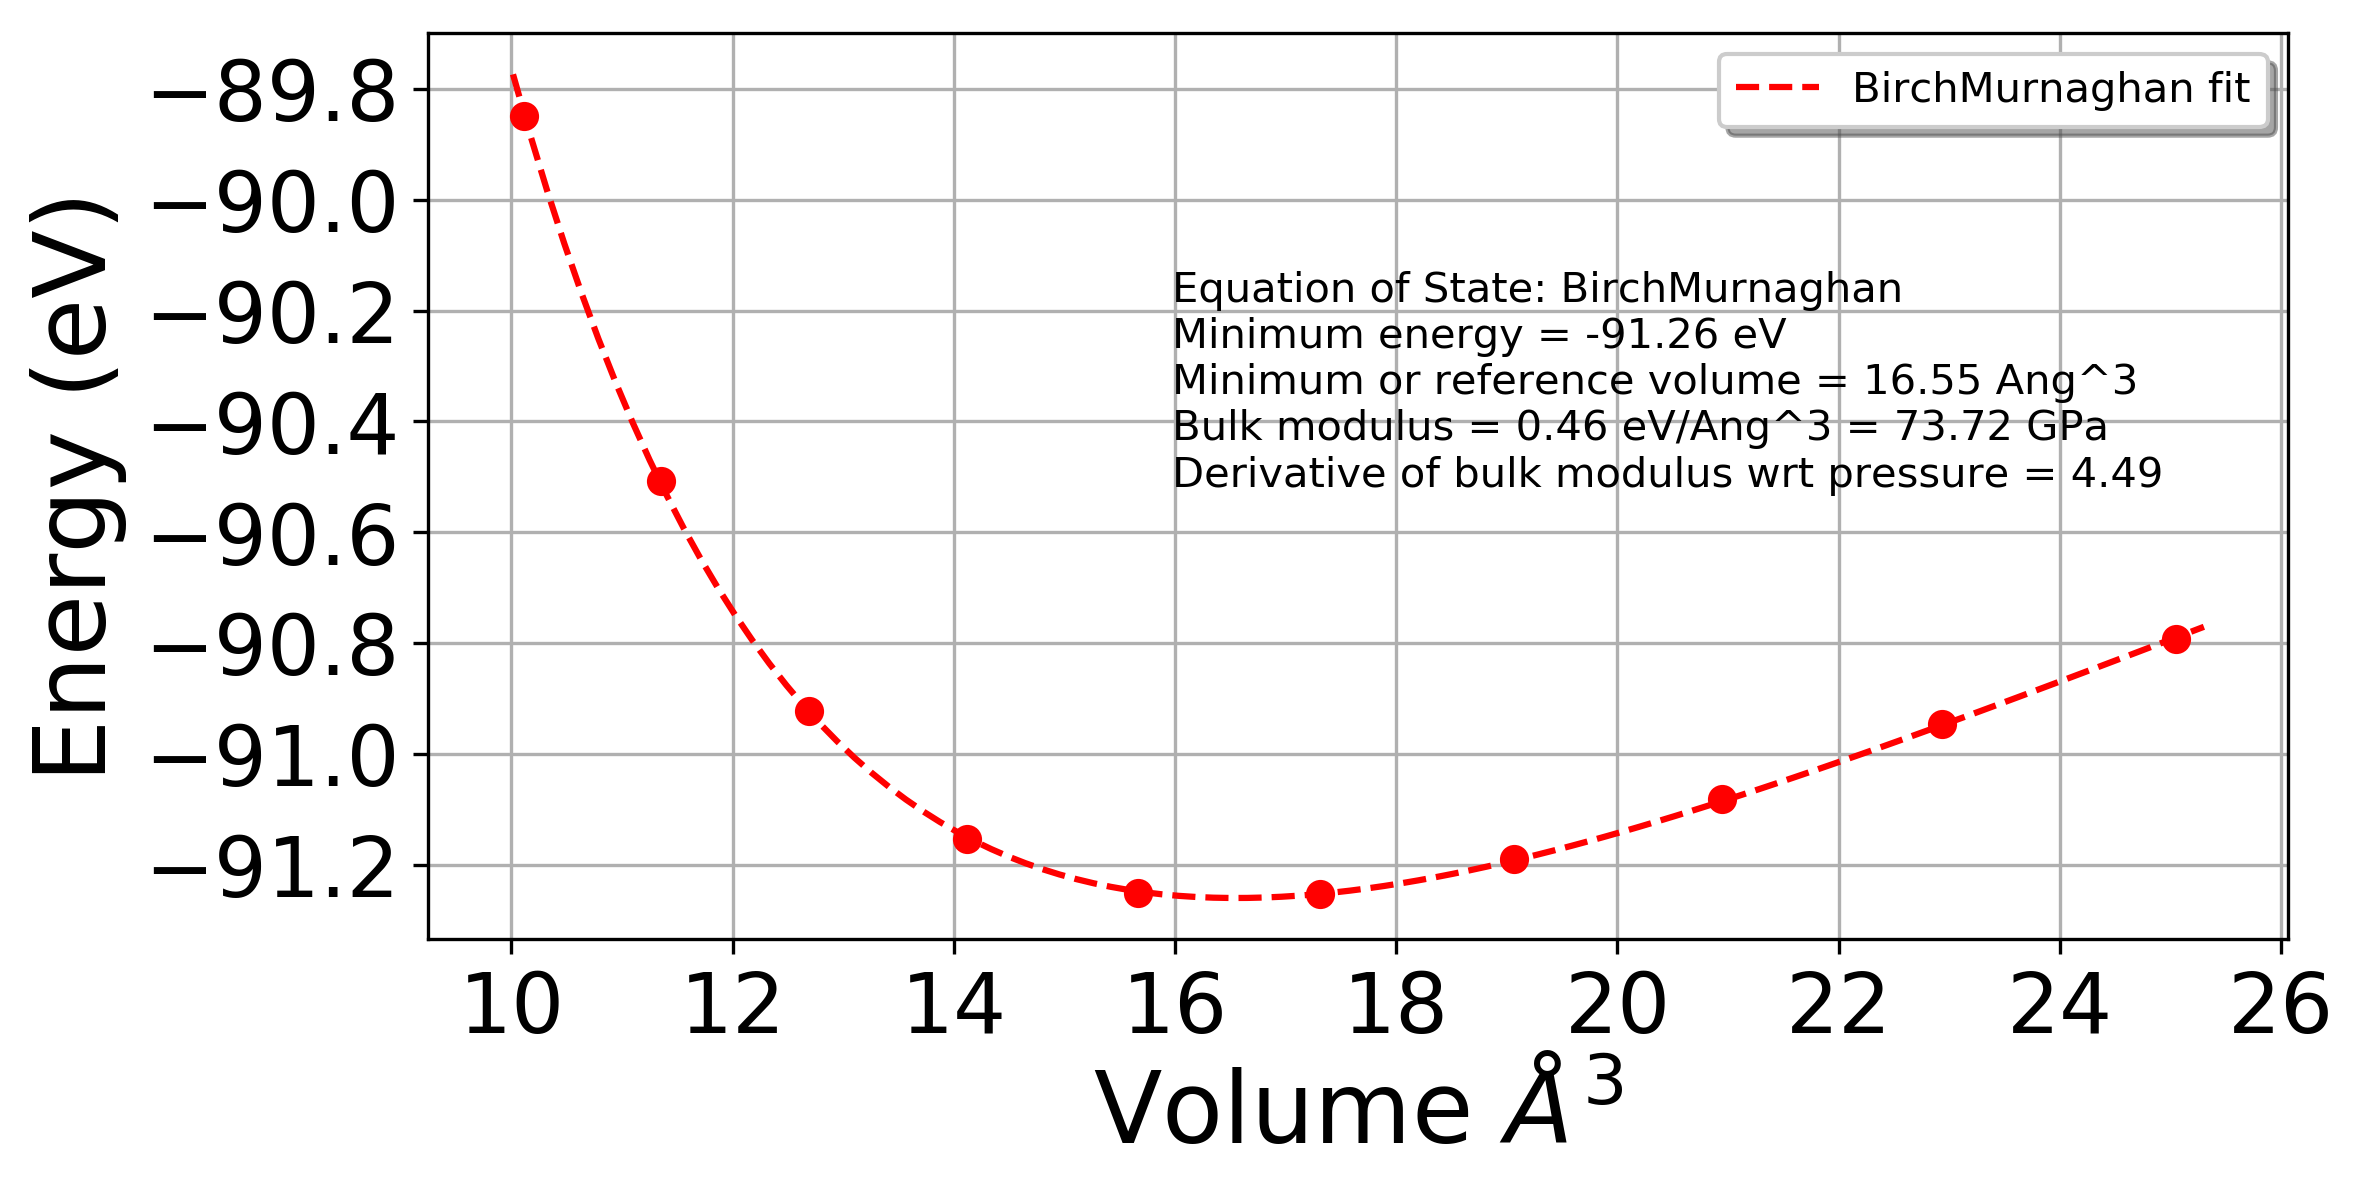

In [13]:
eos_plot = a['birch_murnaghan'].plot()
eos_plot.gcf().set_dpi(300)
plt.show()